In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt

__author__ = "Ignacio Casso, Daniel Gamo, Gwydion J. Martín, Alberto Terceño"


def sigmoid(z):
    return 1/(1+np.exp(z))

class Perceptron(object):
    
    def __init__(self):
        self.bW = np.array([])
        #self.fig, self.ax = plt.subplots(1,1)
    
        #self.ax.set_xlim(-20,20)
        #self.ax.set_ylim(-20,20)
        #self.ax.set_aspect('equal')
        pass
              
    # x:numpy.array(N,D+1) (con columna de 1s)
    def get_nn_value(self, x):
        return sigmoid(x.dot(self.bW))#Funciona aunque bw no sea matriz, devuelve array (o numero si N=1)

    # x:numpy.array(N,D) (sin columna de 1s); t: numpy.array(N)
    def train(self, x, t, epochs=20, batch_size=5, epsilon=0.1):
        D=x.shape[1]
        n=x.shape[0]
        self.bW = np.array([0, 0.5, 5])
        columnaDeUnos = np.array([[1]*n]).T
        x = np.hstack((columnaDeUnos,x))
       
        ind = range(n)
        for _ in range(epochs):
            np.random.shuffle(ind)
            for i in range(0,n+1-batch_size,batch_size):#range(0,n,batch_size) ajustado para descartar sobrantes
                    indexes = ind[i:i+batch_size]
                    grad_bW = self.get_grad(x[indexes], t[indexes])
                    self.bW = (self.bW - epsilon*grad_bW)
    
     # x:numpy.array(N,D) (sin columna de 1s)
    def classify(self, x):
        n=x.shape[0]
        columnaDeUnos = np.array([[1]*n]).T
        x = np.hstack((columnaDeUnos,x))
        outputs = self.get_nn_value(x)
        for i in range(n):
            if (outputs[i]<=0.5):
                outputs[i]=0
            else:
                outputs[i]=1

        #x_min, x_max = np.min(x)-5, np.max(x)+5
        #abscissas = np.array([x_min,x_max])
        #ordinates = -self.bW[1] / self.bW[2] * abscissas - self.bW[0] / self.bW[2]
        #plt.axis('equal')
        #plt.scatter(x[:,0],x[:,1])
        #plt.plot(abscissas,ordinates)

        return outputs
    
    # x:numpy.array(N,D+1) (con columna de 1s); t: numpy.array(N)
    def get_grad(self,x,t):#derivada de En respecto de Wi = (Yn-Tn)*Xni
        n=x.shape[0]
        delta = self.get_nn_value(x)-t                  #Array (y1-t1, ... , yn-tn)
        matGradientes = delta[:,np.newaxis] * x         #Matriz con el n-esimo gradiente en la fila n (NxD+1)
        grad_bW = np.sum(matGradientes, axis=0) / n     #Suma las filas de la matriz, devuelve array de dimension D+1
        return grad_bW


In [3]:
perceptron = Perceptron()

In [4]:
nb_points = 20
x_black = np.random.randn(nb_points, 2) + np.array([-5, 0])
x_red = np.random.randn(nb_points, 2) + np.array([5, 0])
x_data = np.vstack((x_black, x_red))
t_data = np.array([0]*20 + [1]*20)

In [5]:
x_min, x_max = -20, 20
abscisas = np.array([x_min, x_max])

In [6]:
perceptron.train(x_data, t_data, 0, 40, 0.1)

In [7]:
bW = perceptron.bW
if (bW[2]!=0):
    ordinates = -bW[1] / bW[2] *abscisas - bW[0] / bW[2]
else:
    aux = -bW[0] / bW[1]
    abcisas = np.array([aux, aux])
    ordinates = np.array([-19,19])

(-22.0, 22.0, -2.2345268526258244, 2.9250639051423151)

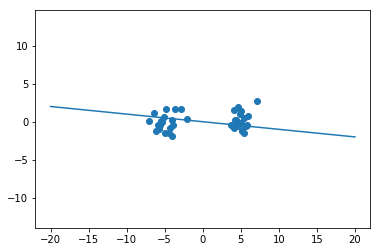

In [8]:
plt.scatter(x_data[:, 0], x_data[:, 1])
plt.plot(abscisas, ordinates)
plt.axis('equal')

In [9]:
perceptron.train(x_data, t_data, 20, 40, 0.1)

In [10]:
bW = perceptron.bW
if (bW[2]!=0):
    ordinates = -bW[1] / bW[2] *abscisas - bW[0] / bW[2]
else:
    aux = -bW[0] / bW[1]
    abcisas = np.array([aux, aux])
    ordinates = np.array([-19,19])

(-22.0, 22.0, -41.145189514104146, 41.138815024345377)

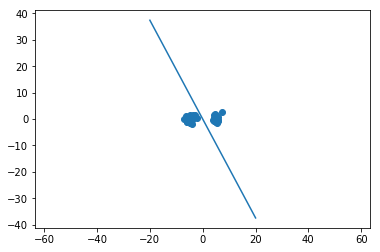

In [11]:
plt.scatter(x_data[:, 0], x_data[:, 1])
plt.plot(abscisas, ordinates)
plt.axis('equal')

In [35]:
m = 5
z_black = np.random.randn(m, 2) + np.array([-5, 0])
z_red = np.random.randn(m, 2) + np.array([5, 0])
z_data = np.vstack((z_black, z_red))

In [36]:
perceptron.classify(z_data)

array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])